<a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_4_Attribute_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY5021/2024/PD_logo.png" align=center alt="UL Geography logo"/>

# Attribute Data

In the Vector Data notebook, we looked at how we can use coordinates as Points, Lines, and Polygons. This is the fundamental basis for a huge amount of geospatial data.

I mentioned through the course of that Notebook some examples of what these could each be used for. 

Points could represent trees, locations of environmental monitors, bus stops, peaks of mountains - any specific single location.

Lines could be roads, cycle lanes, railways, shipping routes, flight paths of birds or aircraft, rivers, fences, hedges - anything which starts in one place and finishes in another.

Polygons could be countries, counties, cities, buildings, land parcels, a forest, a lake, a flooded area - anything which covers a discrete area.

If you just have the coordinates, how do you know which is which?

Fair enough, at a base level, it might be obvious that this polygon is the country of Ireland, and that smaller one is a building; and certainly if you've created the data, you'll probably know what you've created. But usually you'll want to distinguish features from each other, which means you'll need more than just the coordinates.

For example, in Point data, you might want the heights or the species of the trees, the latest readings from environmental sensors, the routes served at a bus stop, or the elevation of mountain peaks.

For line data, you might want to include the name of a road, whether a cycle lane is shared with pedestrians or not, whether a railway line is for passengers or freight or both, whether a shipping route has car ferries or just freight, the bird species or airline for a flight path, the stream order of a river, the height of a fence or hedge.

For polygon data, you might want the name or population of a country, county, or city, the use of a building, the owner or use of a land parcel, the type of trees in a forest, the name of a lake, the date of a flood.

This is attribute data - information which is included alongside coordinates. The vast majority of the time when you're using vector data, it will have attributes as well as the coordinates.

In order to explain how to work with attribute data, it's useful to get a bit of background on arrays, series, and dataframes. As with vector data, I'll use Python examples to explain the fundamentals, but broadly similar will apply to other geospatial tools, like QGIS and ArcGIS Pro. There will be a little bit of explaining the Python tools in particular though, for those who would like to continue using Python.

## 1. Arrays

If we have a lot of variables of the same kind, it would be inefficient to store them all separately.

In [1]:
a = 5
b = 9
c = 8
d = 3

In [2]:
a

5

In [3]:
b

9

In [4]:
c

8

In [5]:
d

3

Doing things this way means you need a different name for each variable. Each of these variables is going to be stored in a different chunk of memory. If we want to do some data transformation to all of them, we could do it, but it would be rather awkward and inefficient. Say they're distances in km, and we have to convert them to metres.

In [6]:
a = a*1000
b = b*1000
c = c*1000
d = d*1000

In [7]:
a

5000

In [8]:
b

9000

In [9]:
c

8000

In [10]:
d

3000

This isn't just inefficient - it's also slow. That's manageable and not a huge deal when you only have 4 data points, but if you're working with geospatial data, you'll normally have thousands of numbers, not just four or five. Some of the data I work with involves 100,000 datapoints for a day - and I've processed a over a year's worth of data in one go. Something in the region of 50 million data points. If they were all separate variables, that would take a very long time.



## 2. Series

Instead, thanks to Python libraries (a library is a collection of modules; a module is a file of Python code containing a set of definitions for objects or kinds of data, and functions for what you can do with them) such as *NumPy* and *Apache Arrow*, we can store a set of related numbers as an *array*. 

<img src="https://github.com/numpy/numpy/blob/main/branding/logo/primary/numpylogo.png?raw=true" style="height:60px" alt="NumPy logo"/> <img src="https://arrow.apache.org/img/arrow-logo_horizontal_black-txt_white-bg.png" style="height:60px" alt="Apache Arrow logo"/>

An *array* is a set of data which is all the same data type; so Python doesn't have to check the data type for each variable individually. It also stores the values in contiguous blocks of memory, so that operations don't involve the computer searching all over the drive to find the next variable - they're all together in one place. 

Now, a NumPy or Arrow array is just a list of data, it doesn't have anything associated with it. But there are other libraries written to use these arrays for data analysis. One of the most powerful libraries for data processing is *pandas*.

<img src="https://pandas.pydata.org/static/img/pandas.svg" style="height:60px" alt="Pandas logo"/>

Pandas uses arrays to keep datasets together, and provides tools to analyse that data. To use pandas, first we have to import it.

In [11]:
import pandas as pd

Now let's recreate the data above as a series.

In [12]:
series = pd.Series([5, 9, 8, 3])
series

0    5
1    9
2    8
3    3
dtype: int64

Instead of variables a-d, we now have a series which is _indexed_. Want to convert from km to m?

In [13]:
series = series*1000
series

0    5000
1    9000
2    8000
3    3000
dtype: int64

We can still refer to and use individual parts of the data, using the index,  

In [14]:
series[2]

8000

Using the tools provided by pandas, we can do a lot of powerful operations on that series. 

In [15]:
series.describe()

count       4.000000
mean     6250.000000
std      2753.785274
min      3000.000000
25%      4500.000000
50%      6500.000000
75%      8250.000000
max      9000.000000
dtype: float64

This pandas function, ```series.describe()```, calculates some basic statistics on the dataset. There's a lot more you can do with it as well - change the data type, apply mathematical functions, floating averages, and much much more. You don't need to memorise what you can do with it - just look it up when you need in the [documentation](https://pandas.pydata.org/docs/reference/series.html).

## 3. Dataframes

So, that's nice, but what if we have more than one list of related data? For example, my air pollution research involves measuring particulate pollution of two different sizes, along with pressure, temperature, and humidity. Plus date and time of measurement. That could be 6 separate series.

For this, pandas allows multiple arrays to be indexed together as a *DataFrame*.

In [16]:
df = pd.DataFrame(
    {
        "Measurement_time": [
            "2023-11-01 08:00:00",
            "2023-11-01 08:00:30",
            "2023-11-01 08:01:00",
            "2023-11-01 08:01:30",
            "2023-11-01 08:02:00",
        ],
        "PM2.5": [3, 4, 6, 2, 3],
        "PM10": [5, 6, 5, 3, 4],
        "Pressure": [1012, 1012, 1012, 1013, 1013],
        "Temperature": [12.5, 12.7, 13.1, 13.2, 13.6],
        "Humidity": [86, 86, 87, 87, 87],
    }
)
df

,Measurement_time,PM2.5,PM10,Pressure,Temperature,Humidity
0,2023-11-01 08:00:00,3,5,1012,12.5,86
1,2023-11-01 08:00:30,4,6,1012,12.7,86
2,2023-11-01 08:01:00,6,5,1012,13.1,87
3,2023-11-01 08:01:30,2,3,1013,13.2,87
4,2023-11-01 08:02:00,3,4,1013,13.6,87


In the code above, you can see each column header is followed by the data for the relevant column. Pandas knows to interpret this. How to do this with pandas is less important than understanding the overall concept - that we can have multiple arrays associated with a common index. 

Like with DataSeries, pandas includes numerous functions for working with this data. 

In [17]:
df.describe()

,PM2.5,PM10,Pressure,Temperature,Humidity
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.600000,4.600000,1012.400000,13.020000,86.600000
std,1.516575,1.140175,0.547723,0.432435,0.547723
min,2.000000,3.000000,1012.000000,12.500000,86.000000
25%,3.000000,4.000000,1012.000000,12.700000,86.000000
50%,3.000000,5.000000,1012.000000,13.100000,87.000000
75%,4.000000,5.000000,1013.000000,13.200000,87.000000
max,6.000000,6.000000,1013.000000,13.600000,87.000000


In [18]:
df.dtypes

Measurement_time     object
PM2.5                 int64
PM10                  int64
Pressure              int64
Temperature         float64
Humidity              int64
dtype: object

Here, you can see that the columns contain different types of data. The measurement time one doesn't look right, though - object is usually text, or mixed data. It should be a time format. Well, we can sort that out.

In [19]:
df['timestamp'] = pd.to_datetime(df['Measurement_time'])
df

,Measurement_time,PM2.5,PM10,Pressure,Temperature,Humidity,timestamp
0,2023-11-01 08:00:00,3,5,1012,12.5,86,2023-11-01 08:00:00
1,2023-11-01 08:00:30,4,6,1012,12.7,86,2023-11-01 08:00:30
2,2023-11-01 08:01:00,6,5,1012,13.1,87,2023-11-01 08:01:00
3,2023-11-01 08:01:30,2,3,1013,13.2,87,2023-11-01 08:01:30
4,2023-11-01 08:02:00,3,4,1013,13.6,87,2023-11-01 08:02:00


In [20]:
df.dtypes

Measurement_time            object
PM2.5                        int64
PM10                         int64
Pressure                     int64
Temperature                float64
Humidity                     int64
timestamp           datetime64[ns]
dtype: object

We can delete the original column now - and even make the timestamp column the index of the dataset.

In [21]:
df = df.drop(columns="Measurement_time")
df

,PM2.5,PM10,Pressure,Temperature,Humidity,timestamp
0,3,5,1012,12.5,86,2023-11-01 08:00:00
1,4,6,1012,12.7,86,2023-11-01 08:00:30
2,6,5,1012,13.1,87,2023-11-01 08:01:00
3,2,3,1013,13.2,87,2023-11-01 08:01:30
4,3,4,1013,13.6,87,2023-11-01 08:02:00


In [22]:
df = df.set_index('timestamp')
df

,PM2.5,PM10,Pressure,Temperature,Humidity
timestamp,,,,,
2023-11-01 08:00:00,3,5,1012,12.5,86
2023-11-01 08:00:30,4,6,1012,12.7,86
2023-11-01 08:01:00,6,5,1012,13.1,87
2023-11-01 08:01:30,2,3,1013,13.2,87
2023-11-01 08:02:00,3,4,1013,13.6,87


There's a lot more we can do with this, and again none of it needs to be memorised - just look up the [documentation](https://pandas.pydata.org/docs/reference/frame.html) whwn you need to. 

Anyway, I'm getting away from the main point of using both rows and columns to contain data - much like you see in an Excel spreadsheet. 

One problem though - we're supposed to be talking about geospatial data, and neither the Series nor DataFrame here includes any coordinates. Can pandas do that?

Well, no. I mean, you can include columns of coordinates, but to pandas, they'd just be meaningless data. Instead, for working with geospatial data, we have a different library built on top of pandas: GeoPandas.

## 4. GeoSeries and GeoDataFrames: GeoPandas

GeoPandas adds geospatial properties and functionality to pandas. 

<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" style="height:60px" alt="GeoPandas logo"/>

A GeoPandas GeoSeries is a subclass of a pandas Series, and a GeoDataFrame is a subclass of a pandas DataFrame. So, anything you can do in pandas to a DataFrame, you can do to a GeoDataFrame -  but GeoPandas adds geospatial information, and a range of geospatial tools.

A GeoSeries is a series of Shapely Point, Line, or Polygon coordinates: a geometry series.

A GeoDataFrame is a DataFrame with one column being a geometry GeoSeries. 

In [23]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import Point

By the way, when I'm using these abbreviations on import - these aren't mine, these are conventions. I'm not able to say for sure how they got to be conventions, but in any case, the vast majority of code you'll find online has

```import numpy as np```  
```import pandas as pd```  
```import geopandas as gpd```  

Some are probably just from common use, but there are some which came from the creator. For example, there's a library called seaborn, which is for plotting nice looking graphs. You might think it should be import seaborn as sb or sn, but it's actually

```import seaborn as sns```

because that's the initials of the character Samuel Normal Seaborn from The West Wing. 

Python people are just like this sometimes, I don't know what to tell you. Also, I might mention here that Python is not named after the snake, even if that's the interpretation implied by the existence of Anaconda and similar Python tools. It's named after Monty Python, and you will very often see python tutorials using Monty Python references in their example code, e.g. ```spam``` for variable names. If you don't like it, well, you can always use R.

Anyway, let's recreate the dataframe above, but this time, with added coordinates.

In [24]:
gdf = gpd.GeoDataFrame(
    {
        "Meas_time": [
            "2023-11-01 08:00:00",
            "2023-11-01 08:00:30",
            "2023-11-01 08:01:00",
            "2023-11-01 08:01:30",
            "2023-11-01 08:02:00",
        ],
        "PM2.5": [3, 4, 6, 2, 3],
        "PM10": [5, 6, 5, 3, 4],
        "Pressure": [1012, 1012, 1012, 1013, 1013],
        "Temperature": [12, 12, 13, 13, 13],
        "Humidity": [86, 86, 87, 87, 87],
        "geometry": [Point(555173, 654321), Point(555173, 654321), Point(555173, 654321), Point(555173, 654321), Point(555173, 654321)],
    }
)
gdf

,Meas_time,PM2.5,PM10,Pressure,Temperature,Humidity,geometry
0,2023-11-01 08:00:00,3,5,1012,12,86,POINT (555173.000 654321.000)
1,2023-11-01 08:00:30,4,6,1012,12,86,POINT (555173.000 654321.000)
2,2023-11-01 08:01:00,6,5,1012,13,87,POINT (555173.000 654321.000)
3,2023-11-01 08:01:30,2,3,1013,13,87,POINT (555173.000 654321.000)
4,2023-11-01 08:02:00,3,4,1013,13,87,POINT (555173.000 654321.000)


Now, we're *really* getting somewhere.

This can be plotted on a map:

<Axes: >

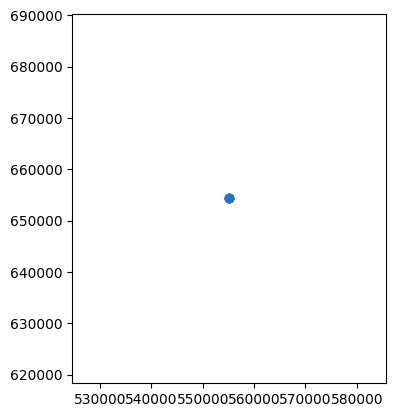

In [25]:
gdf.plot()

Okay, that's not the most useful plot everywhere, because all the readings were taken (or, in this case, made up) at the same point. But we could equally plot points in different locations, or lines, or polygons. Let's go back to our examples from the Vector Data Notebook:

<Axes: >

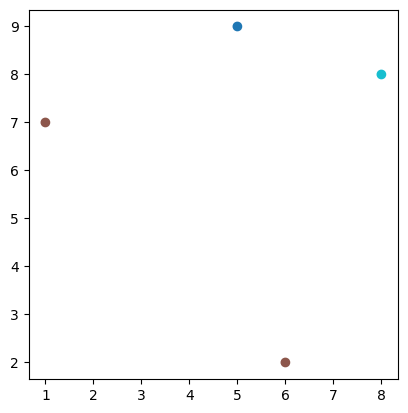

In [26]:
trees = gpd.GeoDataFrame({
    "geometry": [Point(1, 7), Point(6, 2), Point(8, 8), Point(5, 9)],
    "species": ["Oak", "Oak", "Scot's Pine", "Birch"] 
})

trees.plot("species")

Notice the two points which are the same colour - because they're both labelled as oak trees in the species column, which we specified to use in the plot. So, this is a map of trees, distinguished by type. 

We can do similar with lines:

In [27]:
from shapely import LineString, Polygon

<Axes: >

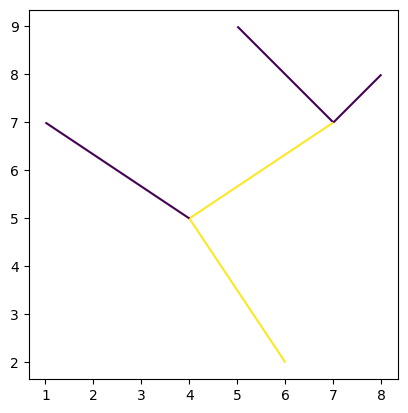

In [28]:
rivers = gpd.GeoDataFrame({
    "geometry": [LineString([(7, 7), (5, 9)]), LineString([(6, 2), (4, 5), (7, 7)]), LineString([(4, 5), (1, 7)]), LineString([(7, 7), (8, 8)])],
    "Stream Order": [1, 2, 1, 1]
})
rivers.plot("Stream Order")

<Axes: >

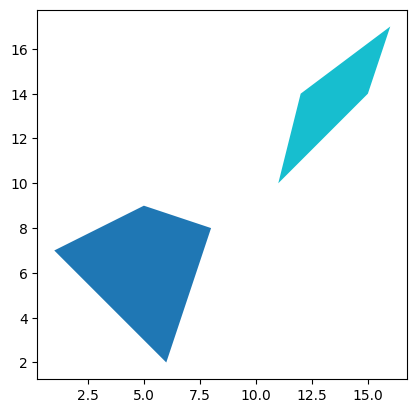

In [29]:
LandUse = gpd.GeoDataFrame({
    "geometry": [Polygon([(1, 7), (6, 2), (8, 8), (5, 9)]), Polygon([(12, 14), (16, 17), (15, 14), (11, 10)])],
    "Land Use": ["Forest", "Rock"]
})
LandUse.plot("Land Use")

Again, this is just the very simplest case using Python, but the principle holds across *any* geospatial tools. You can have point, line, or polygon coordinates associated with data about what's at those coordinates, and plot that data on maps. 

There is one more fundamental point that we need to cover before looking at what we can do with geospatial vector data. 

In the examples from the Vector Data notebooks, which I reused here, you may have noticed that all the coordinates are just simple integers. These obviously don't look like real coordinates.

In the air pollution data example above, you might have noticed the coordinates are a bit different - each has two six-figure numbers. That looks a bit more like real coordinates, perhaps, but it's certainly not latitude and longitude numbers. What type of coordinates are they? 

For the answer to this, and other questions, we have to go to our next Notebook, Coordinate Reference Systems.